# **HOI 4 Maxing**
## Summary
## Introduction
HOI 4 or hearts of iron 4 is a game created by paradox interactive. The game is a World War II simulator allowing one to play as a country during WWII or create a country out of another country, allowing one to roleplay the WWII country of his choice or playing out alternative history senarios where he can change the course of the war. The game has 2 major elements that go into it, the first being the production element, and the second being the war element of the game. In this project we will ignore the war element completely and focus soley on the production element. Production can futher be split into 3 different catarogies those being, construction of non-factory goods, construction of factories, and production of military goods. Although having high factory counts are important along with having non-factory counts are also very helpful it is in the end of the game equipment which wins wars and so ought to be aimed to optomized. Because if one has 1000 factories when Germany invades the soviets but only 20 tanks he will always be at a disadvantage compared to the Soviet Union player who has 100 tanks but 200 factories. Thus it will be our goal to maximize production rather then factory counts. So what are construction of factories? There are 3 types of factories which can be produced, the first of which is the civilian factory. Civilian factories allow players to increase their construction of other factories/non-factories upon the building being completed. The second factory is the dockyard, which allows players to increase their production of naval ships and convoys. The last factory that can be constructed is the military factory which allows the player to construct more military equipment. A certain amount of civilian factories will be unable to be accessed based upon the total military and civilian factories due to them being used for consumer goods. Thus the more miltiary factories one has relative to civilian factories will decrease the number of avaible civilian factories. <br>
Next when producing military equipment there are 3 major things to keep in mind. The first is the total number of military factories producing the piece of equipment, be it guns, tanks, or planes. Said equipment being produced has a cost and for each military factory being placed on it will satify 4.5 amount of its cost per day, so a heavy tank that costs 27 production can be built in 3 days if 2 factories are being placed on it. The second major element is the factory output modifier, which will multiply the 4.5 value by its value, such as the .2 gained from stability increasing the 4.5 for each factory by 1.2. Lastly production is impacted by production efficiency, or how good the production line of the equipment is. Intially this value will start very slow but will grow to its max over time. This value starts at .1 and can grow to .5 over time and these values can be impacted by technology. This value will then multiply the value of 4.5 again after the factory output. Every new factory placed on the production line will also impact the total value by averaging the old production efficency with the new factories start production efficency value (.1 as stated in the example.) Because of this players find that researching prodction efficiency tends to be more powerful then resaerching factory output due in part to an increase from a multiplicative value of .5 to .6 being more powerful then 1.0 to 1.15. Lastly when it comes to non-miltiary builds being constructed most impact military and resouce aspects. This is besides infrastructure (infra) which impacts the time to build a building in a province where it is built. For this reason only infra will be discused in this project. 
## Infra maxing
Infra is a situational build to maximize, of which there are many opinions on how to maximze but most of it is rather situational and non of which takes into account the modifiers for construction bounuses. In this project we will observe where it is worth while building infra and when. The construction formula is it will take the number of civ multiplied by the construction bounus all divided by the building cost (for infra this is 3000). For non-infra buildings you also normally multiply the infra bonus for the province (1.0+.1 for every infra in the provience). With this we can then see if said infra bonus saves us days by graphing the amount of saved days for every piece of infra built in the provience after its starting value given how many building slots the provence has. Bellow is the function created to model this and then some examples of certain locations it does benift to build infra and others where it does not.

In [3]:
import matplotlib.pyplot as plt
def infra_value(infra_level, construction_slots_civs, construction_slots_mils, construction_slots_converts, conversion_cost, infra_construction_bounus, civ_construction_bounus, mil_construction_bounus):
    X, y = [], []
    for i in range (infra_level,11):
        X.append(i)
    
    for i in range(infra_level,11):
        infra_mod_0 = infra_level*.1+1
        infra_mod_1 = i*.1+1
        j=int((construction_slots_civs*10800)/(75*civ_construction_bounus*infra_mod_0))-int((construction_slots_civs*10800)/(75*civ_construction_bounus*infra_mod_1))-int(((i-infra_level)*3000)/(75*infra_construction_bounus))+int((construction_slots_mils*7200)/(75*mil_construction_bounus*infra_mod_0))-int((construction_slots_mils*7200)/(75*mil_construction_bounus*infra_mod_1))+int((construction_slots_converts*conversion_cost)/(75*civ_construction_bounus*infra_mod_0))-int((construction_slots_converts*conversion_cost)/(75*civ_construction_bounus*infra_mod_1))
        y.append(j)
    plt.figure()
    plt.scatter(X,y)
    plt.title("Infra Days Saved")
    plt.xlabel('Infra Level', fontsize=14)
    plt.ylabel('Construction days Saved', fontsize=14)
    plt.show

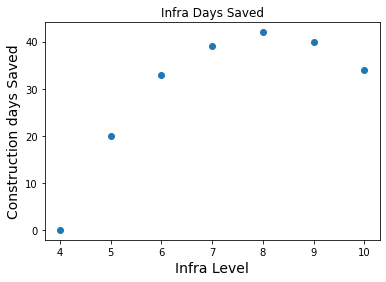

In [4]:
infra_level = 4
construction_slots_civs = 9
construction_slots_mils = 0
construction_slots_converts = 0
conversion_cost = 7500
infra_construction_bounus= 1.1
civ_construction_bounus = 1.1
mil_construction_bounus = 1.15

infra_value(infra_level, construction_slots_civs, construction_slots_mils, construction_slots_converts, conversion_cost, infra_construction_bounus, civ_construction_bounus, mil_construction_bounus)

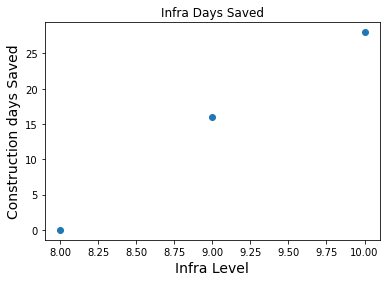

In [143]:
infra_level = 8
construction_slots_civs = 9
construction_slots_mils = 7
construction_slots_converts = 7
conversion_cost = 7500
infra_construction_bounus= 1.1
civ_construction_bounus = 1.45
mil_construction_bounus = 1.65

infra_value(infra_level, construction_slots_civs, construction_slots_mils, construction_slots_converts, conversion_cost, infra_construction_bounus, civ_construction_bounus, mil_construction_bounus)

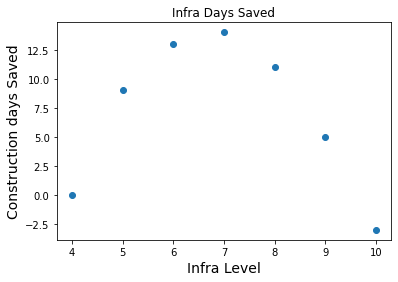

In [148]:
infra_level = 4
construction_slots_civs = 0
construction_slots_mils = 14
construction_slots_converts = 0
conversion_cost = 7500
infra_construction_bounus= 1.35
civ_construction_bounus = 1.45
mil_construction_bounus = 1.65

infra_value(infra_level, construction_slots_civs, construction_slots_mils, construction_slots_converts, conversion_cost, infra_construction_bounus, civ_construction_bounus, mil_construction_bounus)

## Equipment Maxing

In [4]:
import numpy as np
from numpy import array
import cProfile
# cProfile.run('re.compile("foo|bar")')

## So this time around when we make this program limit yourself to 2 for/while statements to decrease lag time

## Program for making factories while not makign equipment
def construct_no_equipment(time, factorytype, start_construction_points, civs, mils, consumer_goods, construction_bonus, infra_bonus):
    #setting values for how much it costs for civs, mils, conversions, dockyards, ect
    if factorytype == "civs":
        X = 10800
    elif factorytype == "mils":
        X = 7200
    else:
        X = 6400
    #lots of stuff moved over from loop to lighten workload
    bonuses = 5*construction_bonus*infra_bonus
    current_construction = array(start_construction_points)
    cg = civs-(civs+mils)*consumer_goods
    construction = array(int(cg/15)*[15]+[cg%15])*bonuses
    if len(construction) >= len(current_construction):
        current_construction = array(current_construction.tolist() + [0]*(len(construction) - len(current_construction)) )
    else:
        current_construction = current_construction[0:len(construction)]
    c = 0
    for i in range (0, int(time)):
        if c != 0:
            #removing factory points
            current_construction = current_construction[c:]
            #adding in additional factories
            if factorytype == "civs":
                civs += c
            elif factorytype == "mils":
                mils += c
            c = 0
            #consumer goods
            cg = civs-(civs+mils)*consumer_goods
            #how much one day produces for construction points
            construction = array(int(cg/15)*[15]+[cg%15])*bonuses
            #making function for making current construction points align as an array to potenially differing sized array
            if len(construction) != len(current_construction):
                current_construction = array(current_construction.tolist() + [0]*(len(construction) - len(current_construction)) )
        #adding current construction points to this days construction points
        current_construction = construction + current_construction
        #seeing if it went over the amount needed to create new buildings
        if current_construction[0] >= X:
            for i in current_construction:
                if i >= X:
                    c += 1
                else:
                    break
    return(civs, mils, current_construction)


## Program for making factories while not makign equipment
def construct_equipment(time, factorytype, start_construction_points, civs, mils, consumer_goods, construction_bonus, infra_bonus, equipment_cost, equipment_in_div,
                        factory_output, starting_production_efficiency, production_efficiency_base, production_efficiency_cap, production_efficiency_growth):
    #setting values for how much it costs for civs, mils, conversions, dockyards, ect
    if factorytype == "civs":
        X = 10800
    elif factorytype == "mils":
        X = 7200
    else:
        X = 6400
    #lots so stuff moved over from loop to lighten workload
    bonuses = 5*construction_bonus*infra_bonus
    production_efficiency = starting_production_efficiency
    p_bonuses = 4.5*factory_output/equipment_cost/equipment_in_div
    current_construction = array(start_construction_points)
    cg = civs-(civs+mils)*consumer_goods
    construction = array(int(cg/15)*[15]+[cg%15])*bonuses
    if len(construction) >= len(current_construction):
        current_construction = array(current_construction.tolist() + [0]*(len(construction) - len(current_construction)) )
    else:
        current_construction = current_construction[0:len(construction)]
    equipment = 0
    p_bonuses_ = p_bonuses*mils
    
    c = 0
    for i in range (0, int(time)):
        if c != 0:
            #removing factory points
            current_construction = current_construction[c:]
            #adding in additional factories
            if factorytype == "civs":
                civs += c
            #new mils also change production efficiency, and how many factories are making equipment
            elif factorytype == "mils":
                production_efficiency = (production_efficiency*mils+c*production_efficiency_base)/(mils+c)
                mils += c
                p_bonuses_ = p_bonuses*mils
            c = 0
            #consumer goods
            cg = civs-(civs+mils)*consumer_goods
            #how much one day produces for construction points
            construction = array(int(cg/15)*[15]+[cg%15])*bonuses
            #making function for making current construction points align as an array to potenially differing sized array
            if len(construction) != len(current_construction):
                current_construction = array(current_construction.tolist() + [0]*(len(construction) - len(current_construction)) )
        #adding current construction points to this days construction points
        current_construction = construction + current_construction
        #production efficiency growth
        if production_efficiency != production_efficiency_cap:
            production_efficiency += .001*(production_efficiency_cap)**2/production_efficiency*production_efficiency_growth
            if production_efficiency >= production_efficiency_cap:
                production_efficiency = production_efficiency_cap
        #production output        
        equipment += p_bonuses_*production_efficiency
        #seeing if it went over the amount needed to create new buildings
        if current_construction[0] >= X:
            for i in current_construction:
                if i >= X:
                    c += 1
                else:
                    break
                    
    return(civs, mils, current_construction, equipment, production_efficiency)

In [162]:
import matplotlib.pyplot as plt
#function that graphs out the total factories and equipment built over time and accross 2 different strategies

def main(time, civs, extra_civs_0, extra_civs_1, extra_civs_2, extra_civs_3, extra_civs_4, mils, extra_mils_0, extra_mils_1, extra_mils_2, extra_mils_3, extra_mils_4, 
        equipment_cost, equipment_in_div, production_retention_0, production_retention_1, production_retention_2, 
        researched_equipment_date_0, researched_equipment_date_1, researched_equipment_date_2, industry_research_time_0, industry_research_time_1, industry_research_time_2,
        industry_research_time_3, industry_research_time_4, industry_research_time_5, consumer_goods_0, consumer_goods_1, consumer_goods_2, consumer_goods_3, consumer_goods_4, consumer_goods_5, 
        construction_bonus_0, construction_bonus_1, construction_bonus_2, construction_bonus_3, construction_bonus_4, construction_bonus_5,
         mil_construction_bonus_0, mil_construction_bonus_1, mil_construction_bonus_2, mil_construction_bonus_3, mil_construction_bonus_4, mil_construction_bonus_5,
        infra_bonus_0, infra_bonus_1, infra_bonus_2, infra_bonus_3, infra_bonus_4, infra_bonus_5, factory_output_0, factory_output_1, factory_output_2, factory_output_3, factory_output_4, factory_output_5,
        production_efficiency_base_0, production_efficiency_base_1, production_efficiency_base_2, production_efficiency_base_3, production_efficiency_base_4, production_efficiency_base_5,
        production_efficiency_cap_0, production_efficiency_cap_1, production_efficiency_cap_2, production_efficiency_cap_3, production_efficiency_cap_4, production_efficiency_cap_5,
        production_efficiency_growth_0, production_efficiency_growth_1, production_efficiency_growth_2, production_efficiency_growth_3, production_efficiency_growth_4, production_efficiency_growth_5):

    #retention broken down by each swap you can do
    list_rentention_ = [.3+.3*production_retention_0, .3+.3*production_retention_1, .3+.3*production_retention_2]
    #list of all researched equipment days
    list_researched_equipment_d_ = [float(researched_equipment_date_0), float(researched_equipment_date_1), float(researched_equipment_date_2)]
    #list of industry tech days
    list_industry_research_t_ = [int(industry_research_time_0), int(industry_research_time_1), int(industry_research_time_2), int(industry_research_time_3), int(industry_research_time_4), int(industry_research_time_5), int(time)]
    #combining research and equipment dates
    list_equip_and_industry_ = sorted(list_industry_research_t_+list_researched_equipment_d_)
    #lists aggregating other dated variables for industry/production growth
    list_e_civs = [0, extra_civs_0, extra_civs_1, extra_civs_2, extra_civs_3, extra_civs_4]
    list_e_mils = [0, extra_mils_0, extra_mils_1, extra_mils_2, extra_mils_3, extra_mils_4]
    list_cg = [consumer_goods_0, consumer_goods_1, consumer_goods_2, consumer_goods_3, consumer_goods_4, consumer_goods_5, consumer_goods_5]
    list_construction = [construction_bonus_0, construction_bonus_1, construction_bonus_2, construction_bonus_3, construction_bonus_4, construction_bonus_5]
    list_mil_construction = [mil_construction_bonus_0, mil_construction_bonus_1, mil_construction_bonus_2, mil_construction_bonus_3, mil_construction_bonus_4, mil_construction_bonus_5]
    list_infra = [infra_bonus_0, infra_bonus_1, infra_bonus_2, infra_bonus_3, infra_bonus_4, infra_bonus_5, infra_bonus_5]
    list_f_output = [factory_output_0, factory_output_1, factory_output_2, factory_output_3, factory_output_4, factory_output_5, factory_output_5]
    list_p_e_base = [production_efficiency_base_0, production_efficiency_base_1, production_efficiency_base_2, production_efficiency_base_3, production_efficiency_base_4, production_efficiency_base_5, production_efficiency_base_5]
    list_p_e_cap = [production_efficiency_cap_0, production_efficiency_cap_1, production_efficiency_cap_2, production_efficiency_cap_3, production_efficiency_cap_4, production_efficiency_cap_5, production_efficiency_cap_5]
    list_p_growth = [production_efficiency_growth_0, production_efficiency_growth_1, production_efficiency_growth_2, production_efficiency_growth_3, production_efficiency_growth_4, production_efficiency_growth_5, production_efficiency_growth_5]
    #new blank lists
    list_tech, list_production_retention, list_cg_, list_construction_, list_infra_, list_f_output_, list_p_e_base_, list_p_e_cap_, list_p_growth_, l_civs, l_mils, l_divs, list_e_civs_, list_e_mils_, list_mil_construction_ = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    
    #making list of days for each catagory and how long it'll stay on said catagory (ex: working on no equipment for 180 days and then making equipment for 200, and swapping to equipment 2 for 1000)
    for i in range(0,9):
        list_tech.append(list_equip_and_industry_[i+1]-list_equip_and_industry_[i])
    if sum(list_tech) > time:
        list_tech = list_tech[:-1]+[(list_tech[7]-sum(list_tech)+time)]
        
    #making a list that can tell if we should be on equipment or no equipment, and then if on equipment what the retention value should be
    c = 0
    for i in list_equip_and_industry_:
        if isinstance(i, float):
            list_production_retention.append(list_rentention_[c])
            c += 1
        elif isinstance(i, int) and c >= 1:
            list_production_retention.append(1)
        else:
            list_production_retention.append(0)
    list_production_retention = list_production_retention[1:10]
    
    #adding in all other variable lists 
    C = 0
    for i in range(0,9):
        if list_production_retention[i] == 0 or list_production_retention[i] == 1:
            list_e_civs_.append(list_e_civs[C])
            list_e_mils_.append(list_e_mils[C])
            list_cg_.append(list_cg[C])
            list_construction_.append(list_construction[C])
            list_mil_construction_.append(list_mil_construction[C])
            list_infra_.append(list_infra[C])
            list_f_output_.append(list_f_output[C])
            list_p_e_base_.append(list_p_e_base[C])
            list_p_e_cap_.append(list_p_e_cap[C])
            list_p_growth_.append(list_p_growth[C])
            
            C += 1
        else:
            list_e_civs_.append(0)
            list_e_mils_.append(0)
            list_cg_.append(list_cg[C])
            list_construction_.append(list_construction[C])
            list_mil_construction_.append(list_mil_construction[C])
            list_infra_.append(list_infra[C])
            list_f_output_.append(list_f_output[C])
            list_p_e_base_.append(list_p_e_base[C])
            list_p_e_cap_.append(list_p_e_cap[C])
            list_p_growth_.append(list_p_growth[C])
            

    if list_production_retention[0] > 0:
        list_production_retention = [1] + list_production_retention[1:9]
    #setting up local variables to save time for integrating mil swapping into the list of factory times
    i_0_ = list_tech[0] 
    i_1_ = list_tech[0] + list_tech[1]
    i_2_ = list_tech[0] + list_tech[1] + list_tech[2]
    i_3_ = list_tech[0] + list_tech[1] + list_tech[2] + list_tech[3]
    i_4_ = list_tech[0] + list_tech[1] + list_tech[2] + list_tech[3] + list_tech[4]
    i_5_ = list_tech[0] + list_tech[1] + list_tech[2] + list_tech[3] + list_tech[4] + list_tech[5]
    i_6_ = list_tech[0] + list_tech[1] + list_tech[2] + list_tech[3] + list_tech[4] + list_tech[5] + list_tech[6]
    i_7_ = list_tech[0] + list_tech[1] + list_tech[2] + list_tech[3] + list_tech[4] + list_tech[5] + list_tech[6] + list_tech[7]
            
    #i is where construction is moved from civs to mils while time is total time we anaylize where best to move from civs to mils
    #5 subsections for time are used to estimate industrial and military tech
    #so if i is at 0 we are starting with mils, and if its at time we don't ever build any mils
    for i in range(0, time):
        #construction of factories without construction of equipment
        #things to consider: 1; lets say player gets researched equipment in 1936 180 days in. So we start first 180 days on 1936 no equipment, next 185 on it with equipment, and then go down the year list
        #so how do we ensure that we can get teh first 180 days in as no equipment, and then the next 185 with equipment in 1936 tech, and then move it year by year from there?
        
        #Integrating military factories into our previous list of times for production with civs and without
        #Integrating military factories into our previous list of times for production with civs and without
        if i < i_0_:
            i_ = (i_0_ - i)
            civ_mils_list = ["civs"]*1+["mils"]*9
            list_tech_ = [list_tech[0] - i_, i_] + list_tech[1:9]
            list_e_civs__ = [0] + list_e_civs_
            list_e_mils__ = [0] + list_e_mils_
            list_cg__ = list_cg_[0:1] + list_cg_
            list_construction__ = list_construction_[0:1] + list_mil_construction_ 
            list_infra__ =  list_infra_[0:1] + list_infra_
            list_f_output__ =  list_f_output_[0:1] + list_f_output_
            list_p_e_base__ =  list_p_e_base_[0:1] + list_p_e_base_
            list_p_e_cap__ =  list_p_e_cap_[0:1] + list_p_e_cap_
            list_p_growth__ =  list_p_growth_[0:1] + list_p_growth_
            if list_production_retention[0] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:1] + [1] + list_production_retention[1:9]
        elif i < i_1_:
            i_ = (i_1_ - i)
            civ_mils_list = ["civs"]*2+["mils"]*8
            list_tech_ = list_tech[0:1] + [list_tech[1] - i_, i_] + list_tech[2:9]
            list_e_civs__ = list_e_civs_[0:2] + [0] + list_e_civs_[2:9]
            list_e_mils__ = list_e_mils_[0:2] + [0] + list_e_mils_[2:9]
            list_cg__ = list_cg_[0:2] + list_cg_[1:9]
            list_construction__ = list_construction_[0:2] + list_mil_construction_[1:9]
            list_infra__ =  list_infra_[0:2] + list_infra_[1:9]
            list_f_output__ =  list_f_output_[0:2] + list_f_output_[1:9]
            list_p_e_base__ =  list_p_e_base_[0:2] + list_p_e_base_[1:9]
            list_p_e_cap__ =  list_p_e_cap_[0:2] + list_p_e_cap_[1:9]
            list_p_growth__ =  list_p_growth_[0:2] + list_p_growth_[1:9]
            if list_production_retention[1] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:2] + [1] + list_production_retention[2:9]
        elif i < i_2_:
            i_ = (i_2_ - i)
            civ_mils_list = ["civs"]*3+["mils"]*7
            list_tech_ = list_tech[0:2] + [list_tech[2] - i_, i_] + list_tech[3:9]
            list_e_civs__ = list_e_civs_[0:3] + [0] + list_e_civs_[3:9]
            list_e_mils__ = list_e_mils_[0:3] + [0] + list_e_mils_[3:9]
            list_cg__ = list_cg_[0:3] + list_cg_[2:9]
            list_construction__ = list_construction_[0:3] + list_mil_construction_[2:9]
            list_infra__ =  list_infra_[0:3] + list_infra_[2:9]
            list_f_output__ =  list_f_output_[0:3] + list_f_output_[2:9]
            list_p_e_base__ =  list_p_e_base_[0:3] + list_p_e_base_[2:9]
            list_p_e_cap__ =  list_p_e_cap_[0:3] + list_p_e_cap_[2:9]
            list_p_growth__ =  list_p_growth_[0:3] + list_p_growth_[2:9]
            if list_production_retention[2] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:3] + [1] + list_production_retention[3:9]
        elif i < i_3_:
            i_ = (i_3_ - i)
            civ_mils_list = ["civs"]*4+["mils"]*6
            list_tech_ = list_tech[0:3] + [list_tech[3] - i_, i_] + list_tech[4:9]
            list_e_civs__ = list_e_civs_[0:4] + [0] + list_e_civs_[4:9]
            list_e_mils__ = list_e_mils_[0:4] + [0] + list_e_mils_[4:9]
            list_cg__ = list_cg_[0:4] + list_cg_[3:9]
            list_construction__ = list_construction_[0:4] + list_mil_construction_[3:9]
            list_infra__ =  list_infra_[0:4] + list_infra_[3:9]
            list_f_output__ =  list_f_output_[0:4] + list_f_output_[3:9]
            list_p_e_base__ =  list_p_e_base_[0:4] + list_p_e_base_[3:9]
            list_p_e_cap__ =  list_p_e_cap_[0:4] + list_p_e_cap_[3:9]
            list_p_growth__ =  list_p_growth_[0:4] + list_p_growth_[3:9]    
            if list_production_retention[3] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:4] + [1] + list_production_retention[4:9]
        elif i < i_4_:
            i_ = (i_4_ - i)
            civ_mils_list = ["civs"]*5+["mils"]*5
            list_tech_ = list_tech[0:4] + [list_tech[4] - i_, i_] + list_tech[5:9]
            list_e_civs__ = list_e_civs_[0:5] + [0] + list_e_civs_[5:9]
            list_e_mils__ = list_e_mils_[0:5] + [0] + list_e_mils_[5:9]
            list_cg__ = list_cg_[0:5] + list_cg_[4:9]
            list_construction__ = list_construction_[0:5] + list_mil_construction_[4:9]
            list_infra__ =  list_infra_[0:5] + list_infra_[4:9]
            list_f_output__ =  list_f_output_[0:5] + list_f_output_[4:9]
            list_p_e_base__ =  list_p_e_base_[0:5] + list_p_e_base_[4:9]
            list_p_e_cap__ =  list_p_e_cap_[0:5] + list_p_e_cap_[4:9]
            list_p_growth__ =  list_p_growth_[0:5] + list_p_growth_[4:9]
            if list_production_retention[4] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:5] + [1] + list_production_retention[5:9]
        elif i < i_5_:
            i_ = (i_5_ - i)
            civ_mils_list = ["civs"]*6+["mils"]*4
            list_tech_ = list_tech[0:5] + [list_tech[5] - i_, i_] + list_tech[6:9]
            list_e_civs__ = list_e_civs_[0:6] + [0] + list_e_civs_[6:9]
            list_e_mils__ = list_e_mils_[0:6] + [0] + list_e_mils_[6:9]
            list_cg__ = list_cg_[0:6] + list_cg_[5:9]
            list_construction__ = list_construction_[0:6] + list_mil_construction_[5:9]
            list_infra__ =  list_infra_[0:6] + list_infra_[5:9]
            list_f_output__ =  list_f_output_[0:6] + list_f_output_[5:9]
            list_p_e_base__ =  list_p_e_base_[0:6] + list_p_e_base_[5:9]
            list_p_e_cap__ =  list_p_e_cap_[0:6] + list_p_e_cap_[5:9]
            list_p_growth__ =  list_p_growth_[0:6] + list_p_growth_[5:9]
            if list_production_retention[5] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:6] + [1] + list_production_retention[6:9]
        elif i < i_6_:
            i_ = (i_6_ - i)
            civ_mils_list = ["civs"]*7+["mils"]*3
            list_tech_ = list_tech[0:6] + [list_tech[6] - i_, i_] + list_tech[7:9]
            list_e_civs__ = list_e_civs_[0:7] + [0] + list_e_civs_[7:9]
            list_e_mils__ = list_e_mils_[0:7] + [0] + list_e_mils_[7:9]
            list_cg__ = list_cg_[0:7] + list_cg_[6:9]
            list_construction__ = list_construction_[0:7] + list_mil_construction_[6:9]
            list_infra__ =  list_infra_[0:7] + list_infra_[6:9]
            list_f_output__ =  list_f_output_[0:7] + list_f_output_[6:9]
            list_p_e_base__ =  list_p_e_base_[0:7] + list_p_e_base_[6:9]
            list_p_e_cap__ =  list_p_e_cap_[0:7] + list_p_e_cap_[6:9]
            list_p_growth__ =  list_p_growth_[0:7] + list_p_growth_[6:9]
            if list_production_retention[6] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:7] + [1] + list_production_retention[7:9]

        elif i <= i_7_:
            i_ = (i_7_ - i)
            civ_mils_list = ["civs"]*8+["mils"]*2
            list_tech_ = list_tech[0:7] + [list_tech[7] - i_, i_] + list_tech[8:9]
            list_e_civs__ = list_e_civs_[0:8] + [0] + list_e_civs_[8:9]
            list_e_mils__ = list_e_mils_[0:8] + [0] + list_e_mils_[8:9]
            list_cg__ = list_cg_[0:8] + list_cg_[7:9]
            list_construction__ = list_construction_[0:8] + list_mil_construction_[7:9] 
            list_infra__ =  list_infra_[0:8] + list_infra_[7:9] 
            list_f_output__ =  list_f_output_[0:8] + list_f_output_[7:9] 
            list_p_e_base__ =  list_p_e_base_[0:8] + list_p_e_base_[7:9] 
            list_p_e_cap__ =  list_p_e_cap_[0:8] + list_p_e_cap_[7:9] 
            list_p_growth__ =  list_p_growth_[0:8] + list_p_growth_[7:9] 
            if list_production_retention[7] == 0:
                list_production_retention_ = [0] + list_production_retention
            else:
                list_production_retention_ = list_production_retention[0:8] + [1] + list_production_retention[8:9]
        eqp = 0
        #add i to list_tech and list_production_retention
        if list_production_retention_[0] == 0:
            c0 = construct_no_equipment(list_tech_[0], civ_mils_list[0], [0], civs, mils, list_cg__[0], list_construction__[0], list_infra__[0])
        else: 
            c0 = construct_equipment(time, civ_mils_list[0], [0], civs, mils, list_cg__[0], 
                                     list_construction__[0], list_infra__[0], equipment_cost, equipment_in_div, list_f_output__[0], list_p_e_cap__[0], list_p_e_base__[0], list_p_e_cap__[0], list_p_growth__[0])
            
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c0) == 3:
            PE_ = list_p_e_base__[1] *list_production_retention_[1]
        else:
            PE_ = c0[4]*list_production_retention_[1]
            eqp += c0[3]

        if list_production_retention_[1] == 0:
            c1 = construct_no_equipment(list_tech_[1], civ_mils_list[1], c0[2], c0[0] + list_e_civs__[1], c0[1] + list_e_mils__[1], list_cg__[1], list_construction__[1], list_infra__[1])
        else:
            c1 = construct_equipment(list_tech_[1], civ_mils_list[1], c0[2], c0[0] + list_e_civs__[1], c0[1] + list_e_mils__[1], list_cg__[1], 
                                     list_construction__[1], list_infra__[1], equipment_cost, equipment_in_div, list_f_output__[1], PE_, list_p_e_base__[1], list_p_e_cap__[1], list_p_growth__[1])
                
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c1) == 3:
            PE_ = list_p_e_base__[2] *list_production_retention_[2]
        else:
            PE_ = c1[4]*list_production_retention_[2]
            eqp += c1[3]

        if list_production_retention_[2] == 0:
            c2 = construct_no_equipment(list_tech_[2], civ_mils_list[2], c1[2], c1[0] + list_e_civs__[2], c1[1] + list_e_mils__[2], list_cg__[2], list_construction__[2], list_infra__[2])
        else:
            c2 = construct_equipment(list_tech_[2], civ_mils_list[2], c1[2], c1[0] + list_e_civs__[2], c1[1] + list_e_mils__[2], list_cg__[2], 
                                     list_construction__[2], list_infra__[2], equipment_cost, equipment_in_div, list_f_output__[2], PE_, list_p_e_base__[2], list_p_e_cap__[2], list_p_growth__[2])
                
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c2) == 3:
            PE_ = list_p_e_base__[3] *list_production_retention_[3]
        else:
            PE_ = c2[4]*list_production_retention_[3]
            eqp += c2[3]

        if list_production_retention_[3] == 0:
            c3 = construct_no_equipment(list_tech_[3], civ_mils_list[3], c2[2], c2[0] + list_e_civs__[3], c2[1] + list_e_mils__[3], list_cg__[3], list_construction__[3], list_infra__[3])
        else:
            c3 = construct_equipment(list_tech_[3], civ_mils_list[3], c2[2], c2[0] + list_e_civs__[3], c2[1] + list_e_mils__[3], list_cg__[3], 
                                     list_construction__[3], list_infra__[3], equipment_cost, equipment_in_div, list_f_output__[3], PE_, list_p_e_base__[3], list_p_e_cap__[3], list_p_growth__[3])
                
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c3) == 3:
            PE_ = list_p_e_base__[4] *list_production_retention_[4]
        else:
            PE_ = c3[4]*list_production_retention_[4]
            eqp += c3[3]

        if list_production_retention_[4] == 0:
            c4 = construct_no_equipment(list_tech_[4], civ_mils_list[4], c3[2], c3[0] + list_e_civs__[4], c3[1] + list_e_mils__[4], list_cg__[4], list_construction__[4], list_infra__[4])
        else:
            c4 = construct_equipment(list_tech_[4], civ_mils_list[4], c3[2], c3[0] + list_e_civs__[4], c3[1] + list_e_mils__[4], list_cg__[4], 
                                     list_construction__[4], list_infra__[4], equipment_cost, equipment_in_div, list_f_output__[4], PE_, list_p_e_base__[4], list_p_e_cap__[4], list_p_growth__[4])
                
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c4) == 3:
            PE_ = list_p_e_base__[5] *list_production_retention_[5]
        else:
            PE_ = c4[4]*list_production_retention_[5]
            eqp += c4[3]

        if list_production_retention_[5] == 0:
            c5 = construct_no_equipment(list_tech_[5], civ_mils_list[5], c4[2], c4[0] + list_e_civs__[5], c4[1] + list_e_mils__[5], list_cg__[5], list_construction__[5], list_infra__[5])
        else:
            c5 = construct_equipment(list_tech_[5], civ_mils_list[5], c4[2], c4[0] + list_e_civs__[5], c4[1] + list_e_mils__[5], list_cg__[5], 
                                     list_construction__[5], list_infra__[5], equipment_cost, equipment_in_div, list_f_output__[5], PE_, list_p_e_base__[5], list_p_e_cap__[5], list_p_growth__[5])
                
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c5) == 3:
            PE_ = list_p_e_base__[6] *list_production_retention_[6]
        else:
            PE_ = c5[4]*list_production_retention_[6]
            eqp += c5[3]

        if list_production_retention_[6] == 0:
            c6 = construct_no_equipment(list_tech_[6], civ_mils_list[6], c5[2], c5[0] + list_e_civs__[6], c5[1] + list_e_mils__[6], list_cg__[6], list_construction__[6], list_infra__[6])
        else:
            c6 = construct_equipment(list_tech_[6], civ_mils_list[6], c5[2], c5[0] + list_e_civs__[6], c5[1] + list_e_mils__[6], list_cg__[6], 
                                     list_construction__[6], list_infra__[6], equipment_cost, equipment_in_div, list_f_output__[6], PE_, list_p_e_base__[6], list_p_e_cap__[6], list_p_growth__[6])
                
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c6) == 3:
            PE_ = list_p_e_base__[7] *list_production_retention_[7]
        else:
            PE_ = c6[4]*list_production_retention_[7]
            eqp += c6[3]

        if list_production_retention_[7] == 0:
            c7 = construct_no_equipment(list_tech_[7], civ_mils_list[7], c6[2], c6[0] + list_e_civs__[7], c6[1] + list_e_mils__[7], list_cg__[7], list_construction__[7], list_infra__[7])
        else:
            c7 = construct_equipment(list_tech_[7], civ_mils_list[7], c6[2], c6[0] + list_e_civs__[7], c6[1] + list_e_mils__[7], list_cg__[7], 
                                     list_construction__[7], list_infra__[7], equipment_cost, equipment_in_div, list_f_output__[7], PE_, list_p_e_base__[7], list_p_e_cap__[7], list_p_growth__[7])
        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        if len(c7) == 3:
            PE_ = list_p_e_base__[8] *list_production_retention_[8]
        else:
            PE_ = c7[4]*list_production_retention_[8]
            eqp += c7[3]

        c8 = construct_equipment(list_tech_[8], civ_mils_list[8], c7[2], c7[0] + list_e_civs__[8], c7[1] + list_e_mils__[8], list_cg__[8], 
                                 list_construction__[8], list_infra__[8], equipment_cost, equipment_in_div, list_f_output__[8], PE_, list_p_e_base__[8], list_p_e_cap__[8], list_p_growth__[8])

        #determining if production efficiency needs to start at base or if it can be taken from the old factory output's
        PE_ = c8[4]*list_production_retention_[9]
        eqp += c8[3]

        c9 = construct_equipment(list_tech_[9], civ_mils_list[9], c8[2], c8[0] + list_e_civs__[9], c8[1] + list_e_mils__[9], list_cg__[9], 
                                 list_construction__[9], list_infra__[9], equipment_cost, equipment_in_div, list_f_output__[9], PE_, list_p_e_base__[9], list_p_e_cap__[9], list_p_growth__[9])
        
        #taking end values and putting them into a list
        l_civs.append(c9[0])
        l_mils.append(c9[1])
        l_divs.append(int(eqp))
        
        
    #graphing lists
    plt.figure(figsize = (24,12))
    plt.plot(l_civs, 'r-', l_mils, 'b-', l_divs, 'g-')
    plt.annotate('max civs'+str((time, max(l_civs))), xy=(time, max(l_civs)), xytext=(time-time/8, max(l_civs)-time/120),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.annotate('max mils'+str((l_mils.index(max(l_mils)), max(l_mils))), xy=(l_mils.index(max(l_mils)), max(l_mils)), xytext=(l_mils.index(max(l_mils))-l_mils.index(max(l_mils))/6, max(l_mils)+l_mils.index(max(l_mils))/80),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.annotate('max divs'+str((l_divs.index(max(l_divs)), max(l_divs))), xy=(l_divs.index(max(l_divs)), max(l_divs)), xytext=(l_divs.index(max(l_divs))+l_divs.index(max(l_divs))/6, max(l_divs)+l_divs.index(max(l_divs))/60),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.title("Optimal Civ to Mil Time")
    plt.xlabel('Day of when moved from Civs to Mils', fontsize=14)
    plt.ylabel('Number of Civs, Mils, and Divs', fontsize=14)
    plt.show

[0, 4, 5, 0, 6, 20, 0, 0, 0] [0, 0, 4, 0, 5, 20, 0, 0, 0]


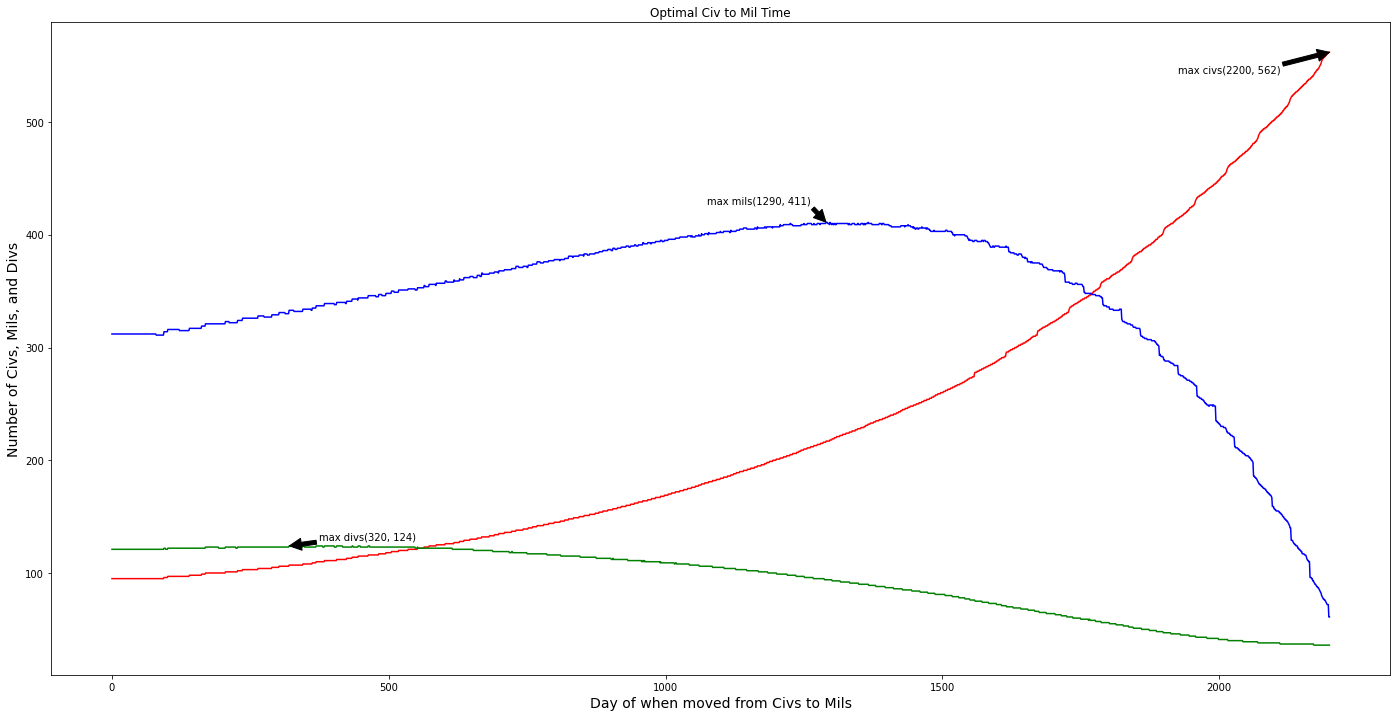

In [161]:
#time till you need all your divs
time = 2200
#number of civs at start, and any additional gained through focuses, trade, or conquest over time
civs, extra_civs_0, extra_civs_1, extra_civs_2, extra_civs_3, extra_civs_4 = 60, 4, 5, 6, 20, 0
#number of mils at start, and any additional gained through focuses, trade, or conquest over time
mils, extra_mils_0, extra_mils_1, extra_mils_2, extra_mils_3, extra_mils_4 = 32, 0, 4, 5, 20, 0
#equipment cost, and number of equipment in division
equipment_cost, equipment_in_div = 30, (40*12)
#production retention upon changing factories first time, second time, and third time
production_retention_0, production_retention_1, production_retention_2 = .4, .8, .8
#research dates for first equipment swap out, second, and third
researched_equipment_date_0, researched_equipment_date_1, researched_equipment_date_2 = 850, 1800, 2199
#when you research your first set of industrial tech, second, third, fourth, and fith
industry_research_time_0, industry_research_time_1, industry_research_time_2, industry_research_time_3, industry_research_time_4, industry_research_time_5 = 0, 70, 300, 600, 1000, 1500
#consumer goods % over industrial industrial tech time
consumer_goods_0, consumer_goods_1, consumer_goods_2, consumer_goods_3, consumer_goods_4, consumer_goods_5 = .35, .2, .15, .1, .15, .02
#construction for civ bonuses over industrial tech time
construction_bonus_0, construction_bonus_1, construction_bonus_2, construction_bonus_3, construction_bonus_4, construction_bonus_5 = .8, 1.25, 1.35, 1.55, 1.6, 1.7
#construction for mil bonuses over industrial tech time
mil_construction_bonus_0, mil_construction_bonus_1, mil_construction_bonus_2, mil_construction_bonus_3, mil_construction_bonus_4, mil_construction_bonus_5 = .8, 1.45, 1.55, 1.75, 1.8, 1.9
#infra bonuses obtained over industrial tech time
infra_bonus_0, infra_bonus_1, infra_bonus_2, infra_bonus_3, infra_bonus_4, infra_bonus_5 = 1.7, 1.7, 1.6, 1.5, 1.5, 1.5
#factory output over industrial time time
factory_output_0, factory_output_1, factory_output_2, factory_output_3, factory_output_4, factory_output_5 = 1.1, 1.25, 1.45, 1.65, 1.7, 1.8
#production efficiency base over industrial time time
production_efficiency_base_0, production_efficiency_base_1, production_efficiency_base_2, production_efficiency_base_3, production_efficiency_base_4, production_efficiency_base_5 = .1, .15, .2, .25, .3, .35
#production efficiency cap over industrial time time
production_efficiency_cap_0, production_efficiency_cap_1, production_efficiency_cap_2, production_efficiency_cap_3, production_efficiency_cap_4, production_efficiency_cap_5 = .5, .6, .7, .8, .9, 1
#production efficiency growth over industrial time time
production_efficiency_growth_0, production_efficiency_growth_1, production_efficiency_growth_2, production_efficiency_growth_3, production_efficiency_growth_4, production_efficiency_growth_5 = 1, 1, 1, 1, 1, 1.1


main(time, civs, extra_civs_0, extra_civs_1, extra_civs_2, extra_civs_3, extra_civs_4, mils, extra_mils_0, extra_mils_1, extra_mils_2, extra_mils_3, extra_mils_4, equipment_cost, equipment_in_div, production_retention_0, production_retention_1, production_retention_2, researched_equipment_date_0, researched_equipment_date_1, researched_equipment_date_2, industry_research_time_0, industry_research_time_1, industry_research_time_2, industry_research_time_3, industry_research_time_4, industry_research_time_5, consumer_goods_0, consumer_goods_1, consumer_goods_2, consumer_goods_3, consumer_goods_4, consumer_goods_5, construction_bonus_0, construction_bonus_1, construction_bonus_2, construction_bonus_3, construction_bonus_4, construction_bonus_5, mil_construction_bonus_0, mil_construction_bonus_1, mil_construction_bonus_2, mil_construction_bonus_3, mil_construction_bonus_4, mil_construction_bonus_5, infra_bonus_0, infra_bonus_1, infra_bonus_2, infra_bonus_3, infra_bonus_4, infra_bonus_5, factory_output_0, factory_output_1, factory_output_2, factory_output_3, factory_output_4, factory_output_5, production_efficiency_base_0, production_efficiency_base_1, production_efficiency_base_2, production_efficiency_base_3, production_efficiency_base_4, production_efficiency_base_5, production_efficiency_cap_0, production_efficiency_cap_1, production_efficiency_cap_2, production_efficiency_cap_3, production_efficiency_cap_4, production_efficiency_cap_5, production_efficiency_growth_0, production_efficiency_growth_1, production_efficiency_growth_2, production_efficiency_growth_3, production_efficiency_growth_4, production_efficiency_growth_5)